# <center><ins>**Business Case: "Walmart" - Confidence Interval and CLT**</ins></center>

**<ins>Dataset Description:</ins>**       
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**<ins>Dataset:</ins>**   
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
* **User_ID:**	User ID
* **Product_ID:**	Product ID
* **Gender:**	Sex of User
* **Age:**	Age in bins
* **Occupation:**	Occupation(Masked)
* **City_Category:**	Category of the City (A,B,C)
* **StayInCurrentCityYears:**	Number of years stay in current city
* **Marital_Status:**	Marital Status
* **ProductCategory:**	Product Category (Masked)
* **Purchase:**	Purchase Amount

# **Defining Problem Statement and Analyzing Basic Metrics**
***
The Management team at **Walmart Inc.** wants to **analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender** and the various other factors to help the business make better decisions. They want to understand if the **spending habits differ between male and female customers**: Do women spend more on Black Friday than men? **`(Assume 50 million customers are male and 50 million are female)`**.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
!gdown 1y1ahWZf_1K3jETg7Qx3BbdZVTzDcPAs0
df = pd.read_csv('walmart_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1y1ahWZf_1K3jETg7Qx3BbdZVTzDcPAs0
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 140MB/s] 


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
# Check the shape of the dataset
df.shape

(550068, 10)

In [ ]:
# Check all the columns of the dataset
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# Check Data Types and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Display statistical summary of all the columns
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
# Display statistical summary of object datatpes
df.describe(include = 'object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
# Display statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### **Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
# To get the unique values in the 'Gender' column
unique_genders = df['Gender'].unique()
print(unique_genders, '\n')

# To get the count of each gender category
gender_counts = df['Gender'].value_counts()
print(gender_counts)

['F' 'M'] 

M    414259
F    135809
Name: Gender, dtype: int64


In [ ]:
# To get the unique age groups
unique_ages = df['Age'].unique()
print(unique_ages, '\n')

# To get the count of each age group
age_counts = df['Age'].value_counts()
print(age_counts)

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


In [ ]:
# To get the unique city categories
unique_city_categories = df['City_Category'].unique()
print(unique_city_categories, '\n')

# To get the count of each city category
city_category_counts = df['City_Category'].value_counts()
print(city_category_counts)

['A' 'C' 'B'] 

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


In [ ]:
# To get the unique values for the stay duration
unique_stay_duration = df['Stay_In_Current_City_Years'].unique()
print(unique_stay_duration, '\n')

# To get the count of each stay duration category
stay_duration_counts = df['Stay_In_Current_City_Years'].value_counts()
print(stay_duration_counts)

['2' '4+' '3' '1' '0'] 

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [ ]:
# For numeric categorical columns like 'Marital_Status' and 'Product_Category,' you can use value counts to see the distribution of unique values.
marital_status_counts = df['Marital_Status'].value_counts()
print(marital_status_counts, '\n')

product_category_counts = df['Product_Category'].value_counts()
print(product_category_counts)

0    324731
1    225337
Name: Marital_Status, dtype: int64 

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64


### **Visual Analysis - Univariate & Bivariate**

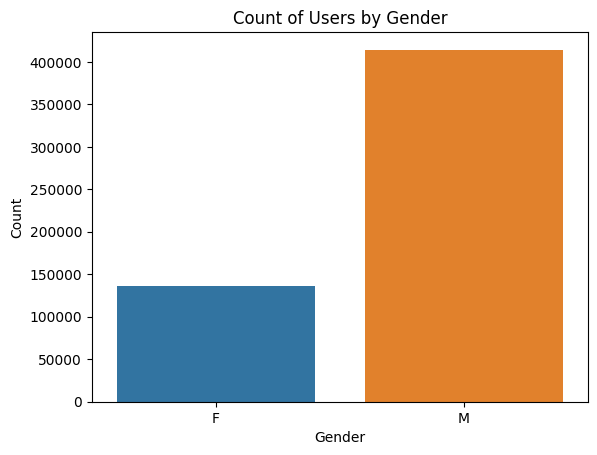

In [ ]:
# Countplot for Gender
# Countplot used to visualize the frequency of each category within a categorical variable.
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Users by Gender')
plt.show()

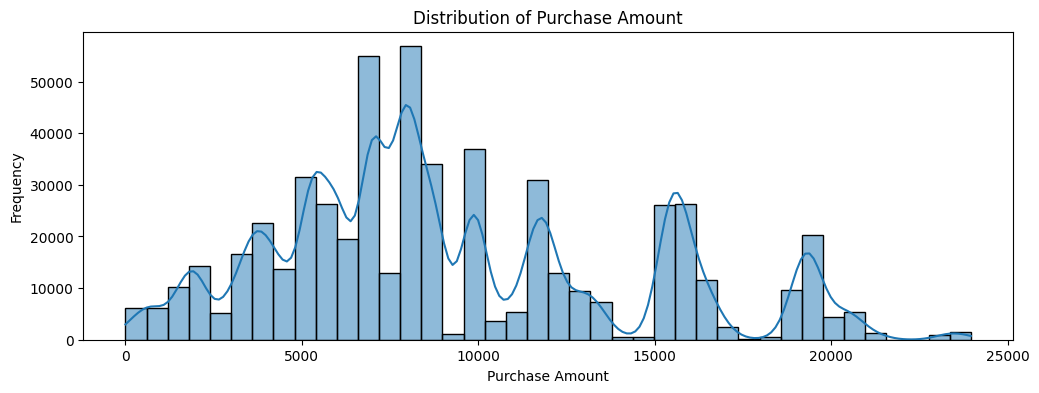

In [ ]:
# Univariate Analysis for Purchase using histplot
plt.figure(figsize = (12,4))
sns.histplot(df['Purchase'], bins=40, edgecolor='k', kde=True)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')
plt.show()

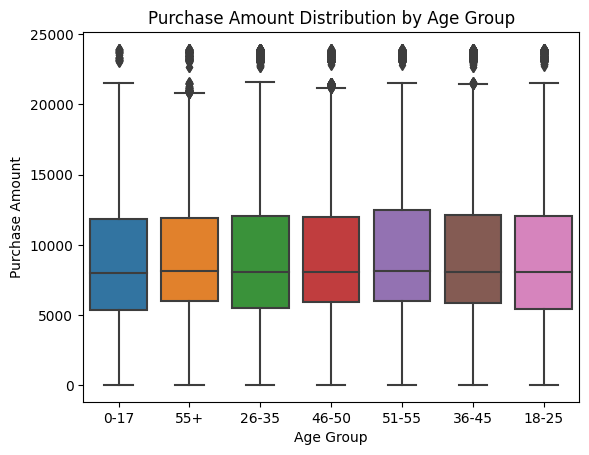

In [ ]:
# Boxplot for Age vs. Purchase
# Boxplot is typically used for continuous variables, but can also help understand the distribution of continuous data within different categories of a categorical variable.
sns.boxplot(x='Age', y='Purchase', data=df)
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount Distribution by Age Group')
plt.xticks(rotation=0)
plt.show()

<ipython-input-25-0f3b0822c144>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


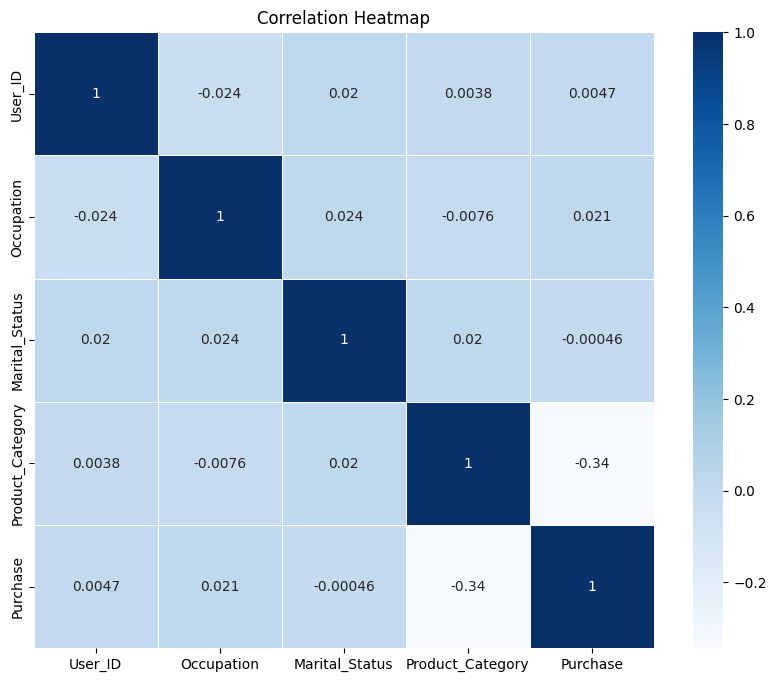

In [ ]:
# Creating a heatmap to visualize the correlation matrix between continuous variables. This will help you identify relationships between pairs of continuous variables.

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

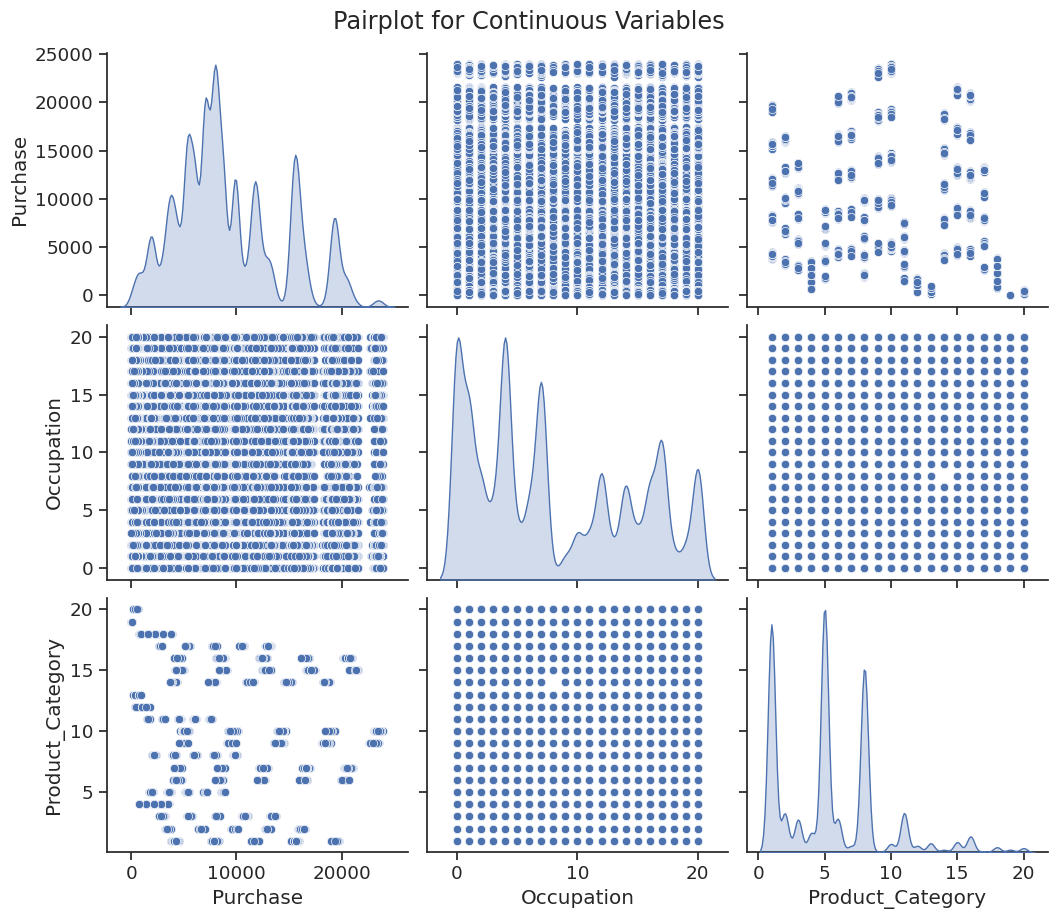

In [ ]:
# Define the subset of continuous variables you want to analyze
continuous_vars = df[['Purchase', 'Occupation', 'Product_Category']]

# Customize the pairplot appearance
sns.set(style="ticks", color_codes=True, font_scale=1.2)
g = sns.pairplot(continuous_vars, diag_kind="kde", markers="o", height=3, aspect=1.2)

# Set titles and labels
g.fig.suptitle("Pairplot for Continuous Variables", y=1.02)
g.axes[1, 0].set_ylabel("Occupation")
g.axes[2, 0].set_ylabel("Product_Category")
g.axes[2, 0].set_xlabel("Purchase")
g.axes[2, 1].set_xlabel("Occupation")
g.axes[2, 2].set_xlabel("Product_Category")

# Show the pairplot
plt.show()

In [ ]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

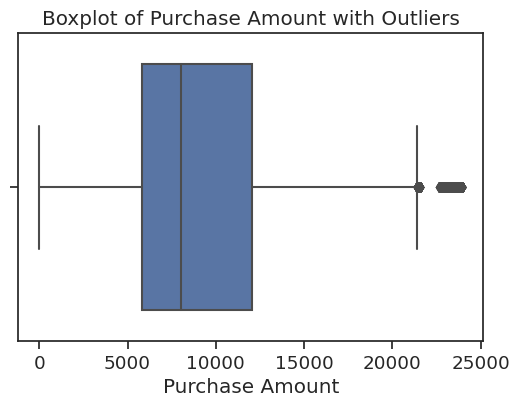

In [ ]:
# Create a boxplot to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x = "Purchase")
plt.title('Boxplot of Purchase Amount with Outliers')
plt.xlabel('Purchase Amount')
plt.show()

In [ ]:
p_25 = np.percentile(df["Purchase"], 25)       #25th percentile or Q1
p_50 = np.percentile(df["Purchase"], 50)       #50th percentile or Q2 (Median)
p_75 = np.percentile(df["Purchase"], 75)       #75th percentile or Q3
print("25th percentile: ", p_25, "\n50th percentile: ", p_50, "\n75th percentile: ", p_75)

iqr = p_75 - p_25       # IQR range b/w 25th percentile and 75th percentile
print("\nIQR: ", iqr)

lower = max(p_25 - 1.5*iqr, 0)        # Calculating min (i.e. lower) points: lower_bound = max(0, 25_percentile - 1.5*IQR)
upper = p_75 + 1.5*iqr        # Calculating max (i.e. upper) points: upper_bound = min(actual_max, 75_percentile + 1.5*IQR)
print("\nLower Bound: ", lower, "\nUpper Bound: ", upper)

25th percentile:  5823.0 
50th percentile:  8047.0 
75th percentile:  12054.0

IQR:  6231.0

Lower Bound:  0 
Upper Bound:  21400.5


In [ ]:
# Checking the % of data which is above the upper_bound (i.e. outliers)
purchase_outlier = df[df["Purchase"] > upper]
len(purchase_outlier)

2677

In [ ]:
# Checking the % of data which is above the upper_bound (i.e. outliers)
(len(df[df["Purchase"] > upper])/len(df))*100

0.4866671029763593

# **Exploratory data analysis (EDA) of the dataset**

In [ ]:
# Calculate the average purchase amount for women and men
avg_purchase_women = df[df['Gender'] == 'F']['Purchase'].mean()
avg_purchase_men = df[df['Gender'] == 'M']['Purchase'].mean()

# Print the average purchase amounts
print("Average purchase amount for women:", avg_purchase_women)
print("Average purchase amount for men:", avg_purchase_men)

Average purchase amount for women: 8734.565765155476
Average purchase amount for men: 9437.526040472265


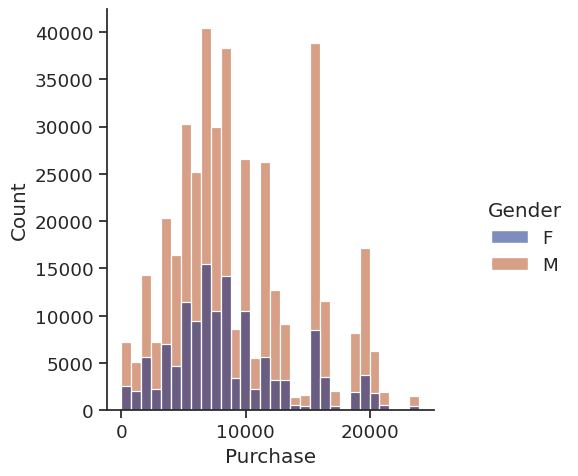

In [ ]:
sns.displot(x='Purchase', data=df, bins=30, hue='Gender', palette='dark')

Text(0, 0.5, 'Purchase Amount')

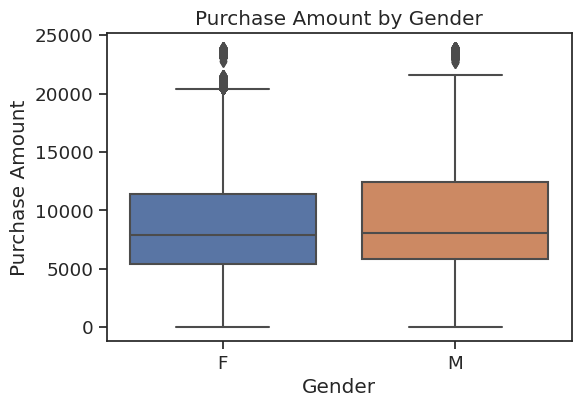

In [ ]:
# Create a boxplot for spending by gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')

In [ ]:
# Perform a t-test to check if the difference is significant
t_stat, p_value = stats.ttest_ind(df[df['Gender'] == 'F']['Purchase'], df[df['Gender'] == 'M']['Purchase'])

# Print the p-value
print("P-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in spending between women and men.")
else:
    print("There is no significant difference in spending between women and men.")

P-value: 0.0
There is a significant difference in spending between women and men.


In [ ]:
# Calculate confidence intervals for female and male spending means
confidence_interval_women = stats.norm.interval(0.95, loc=df[df['Gender'] == 'F']['Purchase'].mean(),
                                               scale=stats.sem(df[df['Gender'] == 'F']['Purchase']))
confidence_interval_men = stats.norm.interval(0.95, loc=df[df['Gender'] == 'M']['Purchase'].mean(),
                                             scale=stats.sem(df[df['Gender'] == 'M']['Purchase']))

# Print confidence intervals
print("Confidence interval for female spending mean:", confidence_interval_women)
print("Confidence interval for male spending mean:", confidence_interval_men)

Confidence interval for female spending mean: (8709.21154714068, 8759.919983170272)
Confidence interval for male spending mean: (9422.01944736257, 9453.032633581959)


In [ ]:
# Check if confidence intervals overlap
if confidence_interval_women[1] < confidence_interval_men[0] or confidence_interval_men[1] < confidence_interval_women[0]:
    print("The confidence intervals do not overlap.")
    print("Walmart can leverage this to tailor marketing and product offerings to both genders differently.")
else:
    print("The confidence intervals overlap.")
    print("There may not be a significant difference between male and female spending habits.")

The confidence intervals do not overlap.
Walmart can leverage this to tailor marketing and product offerings to both genders differently.


In [ ]:
# Calculate the average purchase amount for married and unmarried customers
avg_purchase_married = df[df['Marital_Status'] == 1]['Purchase'].mean()
avg_purchase_unmarried = df[df['Marital_Status'] == 0]['Purchase'].mean()

# Print the average purchase amounts
print("Average purchase amount for married customers:", avg_purchase_married)
print("Average purchase amount for unmarried customers:", avg_purchase_unmarried)

Average purchase amount for married customers: 9261.174574082374
Average purchase amount for unmarried customers: 9265.907618921507


In [ ]:
# Calculate confidence intervals for married and unmarried spending means
confidence_interval_married = stats.norm.interval(0.95, loc=df[df['Marital_Status'] == 1]['Purchase'].mean(),
                                                 scale=stats.sem(df[df['Marital_Status'] == 1]['Purchase']))
confidence_interval_unmarried = stats.norm.interval(0.95, loc=df[df['Marital_Status'] == 0]['Purchase'].mean(),
                                                   scale=stats.sem(df[df['Marital_Status'] == 0]['Purchase']))

# Print confidence intervals
print("Confidence interval for married spending mean:", confidence_interval_married)
print("Confidence interval for unmarried spending mean:", confidence_interval_unmarried)

Confidence interval for married spending mean: (9240.460427057078, 9281.888721107669)
Confidence interval for unmarried spending mean: (9248.61641818668, 9283.198819656332)


In [ ]:
# Perform a t-test to check if the difference is significant
t_stat_married_vs_unmarried, p_value_married_vs_unmarried = stats.ttest_ind(df[df['Marital_Status'] == 1]['Purchase'],
                                                                           df[df['Marital_Status'] == 0]['Purchase'])

# Print the p-value
print("P-value for married vs. unmarried spending:", p_value_married_vs_unmarried)

# Interpret the result
if p_value_married_vs_unmarried < 0.05:
    print("There is a significant difference in spending between married and unmarried customers.")
else:
    print("There is no significant difference in spending between married and unmarried customers.")

P-value for married vs. unmarried spending: 0.7310947525758316
There is no significant difference in spending between married and unmarried customers.


In [ ]:
# Calculate the average purchase amount for each age group
age_groups = df['Age'].unique()
avg_purchase_by_age = {}

for age_group in age_groups:
    avg_purchase_by_age[age_group] = df[df['Age'] == age_group]['Purchase'].mean()

# Print the average purchase amounts by age group
for age_group, avg_purchase in avg_purchase_by_age.items():
    print(f"Average purchase amount for {age_group} age group:", avg_purchase)

Average purchase amount for 0-17 age group: 8933.464640444974
Average purchase amount for 55+ age group: 9336.280459449405
Average purchase amount for 26-35 age group: 9252.690632869888
Average purchase amount for 46-50 age group: 9208.625697468327
Average purchase amount for 51-55 age group: 9534.808030960236
Average purchase amount for 36-45 age group: 9331.350694917874
Average purchase amount for 18-25 age group: 9169.663606261289


In [ ]:
# Calculate confidence intervals for average spending by age group
confidence_intervals_by_age = {}

for age_group in age_groups:
    confidence_interval = stats.norm.interval(0.95, loc=df[df['Age'] == age_group]['Purchase'].mean(),
                                             scale=stats.sem(df[df['Age'] == age_group]['Purchase']))
    confidence_intervals_by_age[age_group] = confidence_interval

# Print confidence intervals for each age group
for age_group, confidence_interval in confidence_intervals_by_age.items():
    print(f"Confidence interval for {age_group} age group:", confidence_interval)

Confidence interval for 0-17 age group: (8851.947970542686, 9014.981310347262)
Confidence interval for 55+ age group: (9269.29883441773, 9403.262084481079)
Confidence interval for 26-35 age group: (9231.733676400028, 9273.647589339747)
Confidence interval for 46-50 age group: (9163.085142648752, 9254.166252287903)
Confidence interval for 51-55 age group: (9483.991472776577, 9585.624589143894)
Confidence interval for 36-45 age group: (9301.669410965314, 9361.031978870433)
Confidence interval for 18-25 age group: (9138.407948753442, 9200.919263769136)


In [ ]:
# To check if there are significant differences in spending among different age groups, we can use an Analysis of Variance (ANOVA) test.
from scipy.stats import f_oneway

# Perform ANOVA test for spending by age group
age_group_data = [df[df['Age'] == age_group]['Purchase'] for age_group in age_groups]
f_statistic, p_value_age_groups = f_oneway(*age_group_data)

# Print the p-value
print("P-value for differences in spending by age group:", p_value_age_groups)

# Interpret the result
if p_value_age_groups < 0.05:
    print("There are significant differences in spending among different age groups.")
else:
    print("There are no significant differences in spending among different age groups.")

P-value for differences in spending by age group: 1.053563939251671e-49
There are significant differences in spending among different age groups.


# **Observations:**
* **"Count"** row indicates the number of **non-null values** in each column. There are **no missing values** in any columns of the data.
* The **"Unique"** row represents the **number of unique values** in each column. There are there are **2 unique values** for **"Gender"** and for **"City_Category"** there are **3 unique values** in the dataset.
* The **"Top"** row displays the **most frequently occurring value** in each column. For instance, in the **"Gender"** column, **"Male"** is the most common value.
* The **"Purchase"** column has **mean (average)** values approximately 9263.97,  **minimum** value as 12, the **25th percentile (first quartile)** as 5823, **median value (50th percentile)** as 8047, the **75th percentile (third quartile)** value as 12054 and the **maximum** value as 23961.
* The data is complete with **no missing values**.
* **Categorical columns (Gender, Age, City_Category, Stay_In_Current_City_Years)** have a **limited number of unique values**.
* **Value counts** provide insights into the distribution of categories within each column.
* The **Purchase** column has a wide range of purchase amounts, with a **mean** of approximately 9263.97.
* **User_ID** and **Product_ID** serve as **unique identifiers** for users and products, respectively, with varying levels of uniqueness.
* The **distribution** appears to be **right-skewed**, with a peak towards **lower purchase amount**s. This suggests that the **majority of purchases** fall within a **lower price range**.
*  The overlaid **KDE curve** provides a smooth estimate of the **probability density function**. It visually represents the likelihood of observing a **particular purchase amount**. The **KDE curve** shows that the **density is highest around the peak of the distribution**.
* The **countplot** for **"Gender"** shows that the dataset has more entries for **males** than **females**, indicating that this data is more **male** dominant, so more biased towards men.
* The **correlation heatmap** provides a visual representation of the relationships between **pairs of continuous variables**. The **Strong positive correlations** are indicated by **darker colors**, while **negative correlations** are **lighter**. There **doesn't** seem to be a strong linear correlation between **"Purchase"** and the other **continuous variables ("Occupation" and "Product_Category")**.
**0.48%** values of **"Purchase"** column are **outliers** but we **do not** wish to drop these values as it may be required to draw some valuable insights and it may be useful for **customer profiling**.
* The **average purchase amount for wome**n is approximately 8734.57, while the **average purchase amount for men** is approximately 9437.53.
* The **calculated p-value from the t-test is very close to zero (0.0)**, indicating an **extremely low probability** that the observed difference in spending between women and men is due to random chance.
* Since the p-value is less than the typical significance level of 0.05, we can conclude that **there is a statistically significant difference in spending between women and men**.
* The amount of money spent by women is less than that spent by men. The **confidence interval for the mean spending of female customers** is approximately (8709.21, 8759.92). This means that we are 95% confident that the true population mean spending for females falls within this interval.
* The **confidence interval for the mean spending of male customers** is approximately (9422.02, 9453.03). Similarly, we are 95% confident that the true population mean spending for males falls within this interval.
* Based on the **confidence interval**s, it can be observed that there is a statistically significant difference in the average spending between female and male customers. Male customers, on average, have a higher spending mean than female customers, and this difference is statistically supported.
* The **confidence intervals for the average spending of male and female customers do not overlap**. This indicates a significant difference in spending habits between these two gender groups. Specifically:
  - **Female customers** have a statistically different average spending compared to male customers.
  - **Male customers**, on average, spend either more or less than female customers, but the difference is significant enough to conclude that there's a distinction in spending patterns.
* The **average purchase amount** for married customers and unmarried customers has been calculated.
* **Confidence intervals** for the mean spending of married and unmarried customers have been determined.
* A **Hypothesis Test (t-test)** was performed to check if there is a significant difference in spending between married and unmarried customers. The **p-value** was used to make this determination.
* The code provided calculates and prints the **average purchase amount for each age group**, **confidence intervals for average spending in each group**, and **performs an ANOVA test** to check for significant differences in spending among age groups.
* If the **p-value from the ANOVA test is less than 0.05**, it indicates significant differences in spending among different age groups. This information can be valuable for tailoring marketing and product strategies to better cater to the preferences of customers in each age group.

# **Insights**

* **Gender Spending:** There is a significant difference in spending between male and female customers, with males spending more on average.
* **Marital Status:** Marital status does not significantly impact spending in this dataset.
* **Age Groups:** Further analysis is needed to understand the spending patterns among different age groups, as this variable may have a significant influence on purchasing behavior.
* **City Categories:** It's worth exploring whether customers from different city categories exhibit different spending behaviors to tailor strategies accordingly.
* **Occupation:** Occupation might influence spending habits, and identifying preferences among different occupations could lead to targeted marketing.

# **Recommendations**
**"Walmart"** is an **American multinational retail corporation** that operates a chain of **supercenters**, **discount departmental stores**, and **grocery stores** from the **United States**. **Walmart** has more than **100 million** customers worldwide.

After having a complete analysis of the **Walmart** dataset, some of the key **recommendations** are shown below:

* **Gender-Based Marketing:** Develop gender-specific marketing campaigns to target male and female customers effectively. Highlight products and promotions aligned with the preferences of each gender. Their data seems to be more on men. This could make it difficult to for us to make conclusive desicions on female purchase patterns. This is the drawback of this dataset.

* **Product Assortment:** Optimize product offerings based on gender preferences. Stock and promote items that appeal to the distinct tastes of male and female customers.

* **Pricing Strategies:** Consider offering gender-specific pricing or discounts on products popular among each gender to attract and retain customers.

* **Store Layout and Experience:** Enhance the shopping experience by aligning store layout, product placement, and the overall shopping environment with customer preferences.

* **Age Group Analysis:** Conduct in-depth analysis of spending patterns among different age groups to identify potential opportunities for customization.

* **City Category Focus:** Investigate whether customers from different city categories have unique spending behaviors and tailor marketing strategies accordingly.

* **Occupation Insights:** Explore how occupation influences spending habits to cater to the preferences of different occupational groups.

* **Market-Specific Strategies:** Customize marketing and product strategies for different markets, considering regional variations in customer behavior.

* **Customer Feedback:** Gather feedback from customers to continuously refine strategies and offerings based on their evolving preferences.

* **Competitor Benchmarking:** Analyze competitor strategies and learn from successful approaches to adapt and improve Walmart's own offerings.

These recommendations provide actionable steps for **Walmart** to **enhance customer satisfaction** and **increase sales** while accommodating the diverse preferences and behaviors of its customer base.